In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

In [45]:
df=pd.read_csv("house.csv")

In [46]:
df.corr().head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286


In [90]:
x = df[["sqft_living"]]
y = df["price"]

In [48]:
#plt.figure(figsize=(7,7))
#sns.regplot(data=df,x="sqft_living",y="price")
#plt.show()

In [91]:
# Split data for train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [92]:
lr = LinearRegression()

In [93]:
# Calculate coefficient and intercept
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
lr.coef_

array([273.80839877])

In [53]:
intercept = lr.intercept_
print(intercept)

-31356.784574860474


In [94]:
lr.score(x_test,y_test)

0.5030774643470591

In [95]:
y_pred = lr.predict(x_test)

In [56]:
y_pred

array([ 732568.6479807 ,  414950.9054128 ,  617569.12049922, ...,
        319117.96584489, 1384232.63704243,  858520.5114128 ])

In [57]:
mse = mean_squared_error(y_pred,y_test)
print(mse)

77554859321.62442


In [58]:
rmse = np.sqrt(mse)
print(rmse)

278486.73096150276


In [59]:
mae = mean_absolute_error(y_pred,y_test)
print(mae)

175221.70016269942


In [60]:
r2 = r2_score(y_test,y_pred)
print(r2)

0.5030774643470591


In [61]:
pf=PolynomialFeatures(2)

x_poly=pf.fit_transform(x)


In [71]:
x_train,x_test,y_train,y_test = train_test_split(x_poly,y,test_size=0.3,random_state=1)

In [72]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
for i in range(1,10):
    pf=PolynomialFeatures(i)
    x_poly=pf.fit_transform(x)
    x_train,x_test,y_train,y_test = train_test_split(x_poly,y,test_size=0.3,random_state=1)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    coefficient = lr.coef_
    lrscore=lr.score(x_test,y_test)
    print("for",i,"degree-iteration",">>>",lrscore)

for 1 degree-iteration >>> 0.5030774643470591
for 2 degree-iteration >>> 0.5311574735206945
for 3 degree-iteration >>> 0.5401886537626621
for 4 degree-iteration >>> 0.49214803209303193
for 5 degree-iteration >>> 0.11308496959753256
for 6 degree-iteration >>> 0.4854900044612047
for 7 degree-iteration >>> -28.423332491388955
for 8 degree-iteration >>> -728.2317928226222
for 9 degree-iteration >>> -6988.919812080429


In [65]:
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [67]:
df.corr().head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286


In [79]:
x = df[["sqft_living","sqft_above","grade","sqft_living15","bedrooms"]]
y = df["price"]

In [69]:
for i in range(0,10):
    pf=PolynomialFeatures(i)
    x_poly=pf.fit_transform(x)
    x_train,x_test,y_train,y_test = train_test_split(x_poly,y,test_size=0.3,random_state=1)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    coefficient = lr.coef_
    lrscore=lr.score(x_test,y_test)
    print("for",i,"degree-iteration",">>>",lrscore)

for 0 degree-iteration >>> -0.0004076018354877142
for 1 degree-iteration >>> 0.5560804485228592
for 2 degree-iteration >>> 0.6381451659184865
for 3 degree-iteration >>> 0.6448940095405803
for 4 degree-iteration >>> -0.5998104098311299
for 5 degree-iteration >>> -24.59978679926145
for 6 degree-iteration >>> -416.8723361070366
for 7 degree-iteration >>> -15505.53445768041
for 8 degree-iteration >>> -9050068.094846496
for 9 degree-iteration >>> -95616025.21853797


In [76]:
x = df[["sqft_living"]]
y = df["price"]

In [96]:
    pf=PolynomialFeatures(3)
    x_poly=pf.fit_transform(x)
    x_train_poly,x_test_poly,y_train,y_test = train_test_split(x_poly,y,test_size=0.3,random_state=1)
    lr=LinearRegression()
    lr.fit(x_train_poly,y_train)
    coefficient = lr.coef_
    lrscore=lr.score(x_test_poly,y_test)
    ypred_poly=lr.predict(x_test_poly)
    r2_score(y_test,ypred)

0.5401886537626621

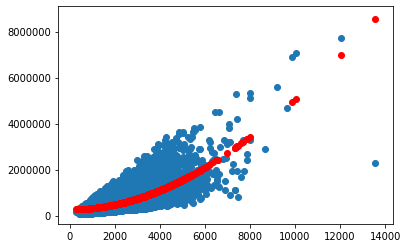

In [99]:
plt.figure()
plt.scatter(x,y)
plt.scatter(x_test,ypred_poly,color="red")
plt.show()